## Where Do People Drink The Most Beer, Wine And Spirits?

<img src="https://s1.qwant.com/thumbr/0x0/3/f/a2d61eb9aa851a55e62456389bde7986e358da62a08b5c5ac98aaa851447dc/alcoholconsumption.gif?u=http%3A%2F%2F4.bp.blogspot.com%2F-0u5Sk_omAEE%2FTV3XZtyPQ1I%2FAAAAAAAAArc%2FyVlSiUp6aTU%2Fs1600%2Falcoholconsumption.gif&q=0&b=1&p=0&a=1">

The dataset for this analysis is from this post in [FiveThirtyEight](https://fivethirtyeight.com/features/dear-mona-followup-where-do-people-drink-the-most-beer-wine-and-spirits/)

Data: https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

drinks = pd.read_csv("https://raw.githubusercontent.com/fivethirtyeight/data/master/alcohol-consumption/drinks.csv")
drinks.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol
0,Afghanistan,0,0,0,0.0
1,Albania,89,132,54,4.9
2,Algeria,25,0,14,0.7
3,Andorra,245,138,312,12.4
4,Angola,217,57,45,5.9


## Problem 1
Convert the following data into tidy format with the headers `country`, `drink` and `servings`. Drop the column `total_litres_of_pure_alcohol`

In [2]:
# Converts the data into tidy format.
tidy_drinks = drinks.melt(
    id_vars=["country"],
    value_vars=["beer_servings", "spirit_servings", "wine_servings"],
    var_name="drink",
    value_name="servings"
)
tidy_drinks

,country,drink,servings
0,Afghanistan,beer_servings,0
1,Albania,beer_servings,89
2,Algeria,beer_servings,25
3,Andorra,beer_servings,245
4,Angola,beer_servings,217
...,...,...,...
574,Venezuela,wine_servings,3
575,Vietnam,wine_servings,1
576,Yemen,wine_servings,0
577,Zambia,wine_servings,4


## Problem 2
Remove `"_servings"` from the data in the tidy dataframe in Problem 1. Who drinks the most beer, wine and spirits? Create three categorical plots of your choice to illustrate the top 10 countries that drink the most wine, beer or spirits.

In [3]:
# Removes "_servings" from the data in the tidy dataframe in Problem 1.
tidy_drinks["drink"] = tidy_drinks.drink.str.split("_servings").str[0]
tidy_drinks

,country,drink,servings
0,Afghanistan,beer,0
1,Albania,beer,89
2,Algeria,beer,25
3,Andorra,beer,245
4,Angola,beer,217
...,...,...,...
574,Venezuela,wine,3
575,Vietnam,wine,1
576,Yemen,wine,0
577,Zambia,wine,4


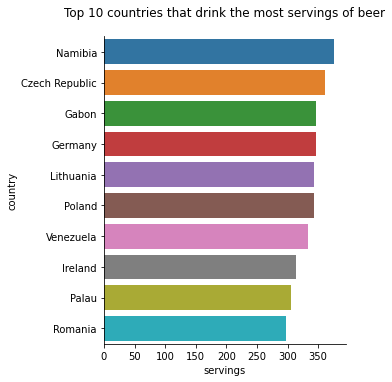

In [4]:
# Gets the top 10 countries that drink the most servings of beer.
top10_beer = tidy_drinks[tidy_drinks["drink"] == "beer"].sort_values(by="servings", ascending=False).head(10)

# Generates a bar plot that illustrates the top 10 countries that drink the most beer.
sns.catplot(
    data=top10_beer,
    y="country",
    x="servings",
    kind="bar")
plt.title("Top 10 countries that drink the most servings of beer", pad=20);

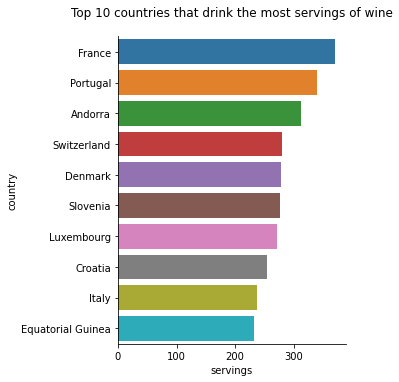

In [5]:
# Gets the top 10 countries that drink the most servings of wine.
top10_wine = tidy_drinks[tidy_drinks["drink"] == "wine"].sort_values(by="servings", ascending=False).head(10)

# Generates a bar plot that illustrates the top 10 countries that drink the most wine.
sns.catplot(
    data=top10_wine,
    y="country",
    x="servings",
    kind="bar")
plt.title("Top 10 countries that drink the most servings of wine", pad=20);

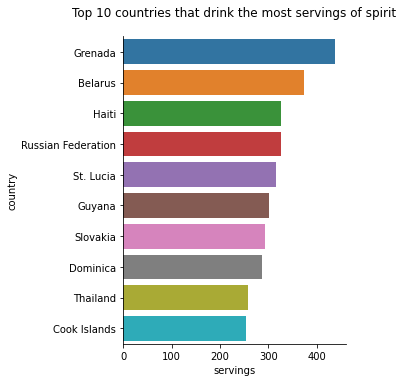

In [6]:
# Gets the top 10 countries that drink the most servings of spirit.
top10_spirit = tidy_drinks[tidy_drinks["drink"] == "spirit"].sort_values(by="servings", ascending=False).head(10)

# Generates a bar plot that illustrates the top 10 countries that drink the most spirit.
sns.catplot(
    data=top10_spirit,
    y="country",
    x="servings",
    kind="bar")
plt.title("Top 10 countries that drink the most servings of spirit", pad=20);

## Problem 3
Create a wide dataframe using `pivot_table` with the tidy dataframe from Problem 2

In [7]:
# Creates a wide dataframe with the tidy dataframe from Problem 2.
pd.pivot_table(tidy_drinks, values="servings", index=["country"], columns="drink")

drink,beer,spirit,wine
country,,,
Afghanistan,0,0,0
Albania,89,132,54
Algeria,25,0,14
Andorra,245,138,312
Angola,217,57,45
...,...,...,...
Venezuela,333,100,3
Vietnam,111,2,1
Yemen,6,0,0
